# Question and Answer
**a.)  Data cleaning including missing values, outliers and multi-collinearity.**

As a part of data cleaning i have tried to find the outliers using the Z-score method and to resolve the outliers i have applied the Log Transformation. For missing values in Source and Destination balance i have substituted -1 using imputation in order to handle the contribution of the features towards the output feature 'isFraud'. For finding the relation between the features i have used the correlation function and heatmap.



**b.) Describe your fraud detection model in elaboration.**

The model is designed keeping in mind all the necessary cleaning and extraction required before training the dataset. Initally we found the outliers in amount feature and replaced it after applying necessary transformation. Later we found the total fraudelent cases for 'isFraud' and 'isFraudFlagged' features and notice that the 'isfraudflagged' feature has marked very few of the transactions as fraud. Hence we ignored the feature alongwith the Destination and Origin of Transation names. Next we substitute the missing values in balance columns and make sure the model makes a note of it while training. Once that is done we perform the oversampling to avoid missclassification and imbalanced dataset resolution.Next we split into test and training data and perform the Model training for various algorithms such as Logistic Regression, Decision Tree and Random Forest. Later we give the inputs to these models the unknown test dataset and evaluate the models using Performance Matrix Parameters.



**c.) How did you select the variables to be included in the model ?**

I selected the features such as Amount,Balance in source before and after transactions, type of transactions and Balance in destination before and after transactions. All the above features are necessary to judge the fraudelent cases in banks and helps us to track down in an better manner.




**d.) Demonstrate the performance of the model by using best set of tools.**

As a part of Performance of Model we foccused on determining various Matrix such as Accuracy, Confusion Matrix and Classification Report.

**e.) What are the key factors that predict fraudulent customer?**

All the monetary features are mostly considered as key features while performing the analysis for Fraudlent features

**f.) What kind of prevention should be adopted while company update its infrastructure?**

The transaction details related to monetary must not be missing wherever possible.The Date based transactions can also play vital role in getting the fraudelent cases. Also, the personal details may hardly contribute towrds of Fraudelent Transactions. 


## 1. Import All the necessary Libraries

In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

# 2. Import data from sheet in Dataframe

In [63]:
df = pd.read_csv('/content/Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# 3. Get the datatypes and description of available data

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [65]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [66]:
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

# 4. Outlier detection in Columns

In [67]:
def Zscore_outlier(df):
    out=[]
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    return out
amt_out = Zscore_outlier(df['amount'])
print(amt_out)

[2421578.09, 2545478.01, 2061082.82, 3776389.09, 2258388.15, 2223005.62, 2107293.71, 2317408.88, 2604219.11, 2441078.3, 2032275.62, 2474181.78, 2837270.65, 10000000.0, 10000000.0, 2930418.44, 2930418.44, 2025330.83, 2062692.94, 2576294.8, 2102252.96, 2222097.28, 2511647.23, 2241254.39, 2011670.91, 2940764.72, 2943845.35, 2861134.92, 2153550.39, 5460002.91, 5460002.91, 2316902.39, 2301415.25, 2283519.94, 2245813.81, 2271227.47, 2063647.78, 2552176.18, 2848328.52, 2234288.78, 2702697.15, 2022478.14, 2059918.28, 2206784.53, 2026545.3, 3236850.76, 2794982.53, 3457807.35, 2767908.66, 2614699.02, 2014771.88, 2107356.28, 2195051.02, 2241986.78, 2015246.93, 2304548.56, 2628265.07, 2117027.99, 2352703.57, 2416072.81, 2370301.7, 2068925.43, 2783998.4, 5677662.29, 2612615.69, 2604737.7, 3007043.04, 2325148.88, 3903432.11, 2419330.48, 2106899.77, 2158290.89, 2420979.43, 2597158.62, 2047252.95, 2029109.94, 2300391.28, 2145086.77, 2045705.04, 2029209.07, 3226604.31, 2288736.8, 2256694.97, 2887748.9,

# 5. Apply log Transformation to remove Outliers

<Figure size 720x288 with 0 Axes>

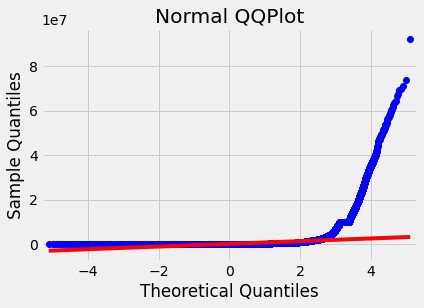

In [68]:
def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(df['amount'])

In [69]:
df['amount'] = np.sqrt(df['amount'])

<Figure size 720x288 with 0 Axes>

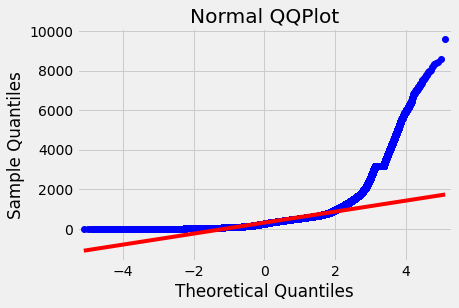

In [70]:
qq_plots(df['amount'])

# 6. Various Types of Transaction

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


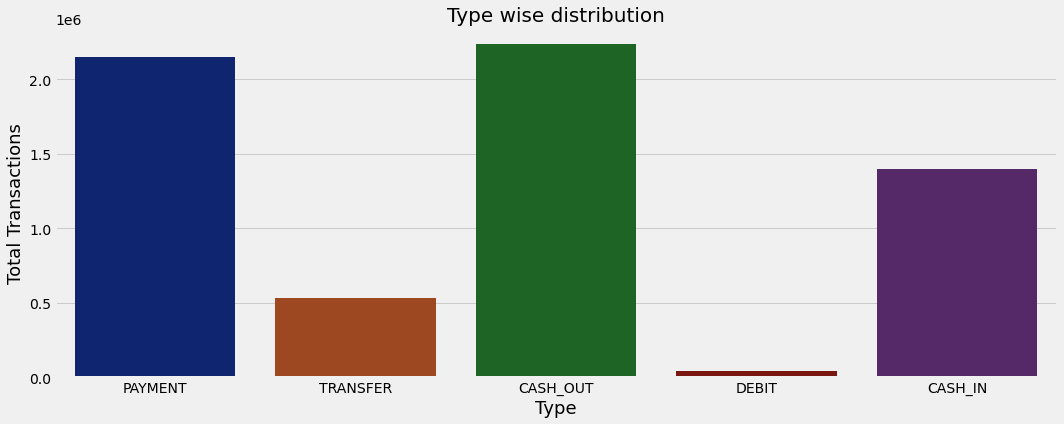

In [71]:
plt.figure(figsize=(16,6))
plt.style.use('fivethirtyeight')
ax=sns.countplot('type',data=df,palette='dark',)
ax.set_xlabel(xlabel='Type',fontsize=18)
ax.set_ylabel(ylabel='Total Transactions',fontsize=18)
ax.set_title(label='Type wise distribution',fontsize=20)
plt.show()

# 7. Fradulent Transactions spread as per 'Type'

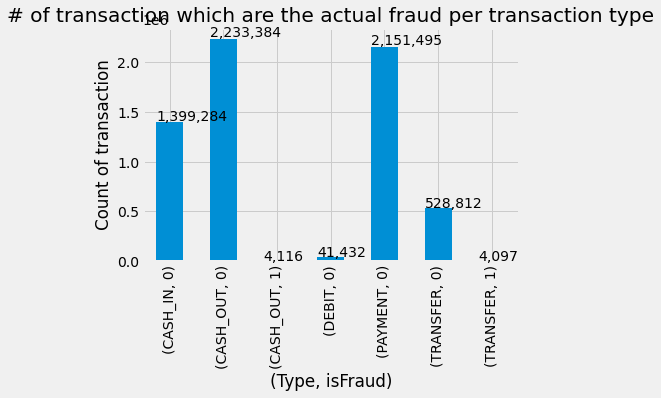

In [72]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar',)
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

# 8. 'isFlaggedFraud' contribution to Fraudelent Transactions

As we perform the analysis of isFlaggedFraud vs types of Transactions we can observe that the total number of flaggedfraud transactions are very less compared to isFraud feature. Hence we can neglect the isFlaggedFraud feature

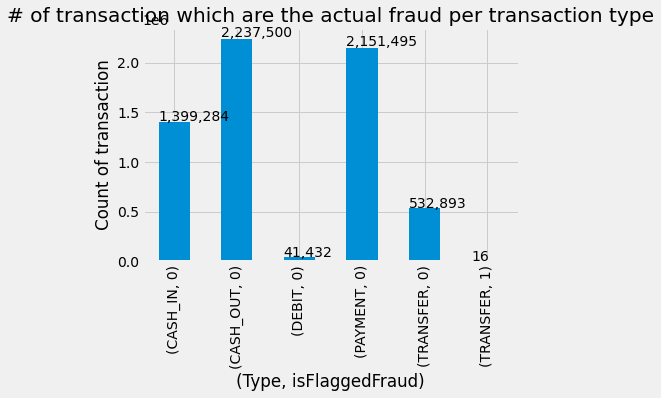

In [73]:
ax = df.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar',)
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

# 9. Discard the non-contributing Columns

As the names of the receiver and transferer is not so significant in determing the Fraud we can neglect those two columns. For simplicity purpose we ignore the step feature as well

In [74]:
df.drop(['isFlaggedFraud'],inplace=True,axis=1)
df.drop(['step','nameOrig','nameDest'],inplace=True,axis=1)
df.head(5)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,99.194960,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,43.177309,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,13.453624,181.0,0.00,0.0,0.0,1
3,CASH_OUT,13.453624,181.0,0.00,21182.0,0.0,1
4,PAYMENT,108.019165,41554.0,29885.86,0.0,0.0,0


# 10. Types of Transactions which contribute most to Fraudelent Transaction

As we perform the analysis of isFraud given the output we can come to a conclusion that only two type of transactions ['TRANSFER', 'CASH_OUT'] contribute towards the IsFraud output feature

In [75]:
count=list(df.loc[df['isFraud']==1,'type'].values)
unique_list = []
     
for x in count:
    if x not in unique_list:
        unique_list.append(x)
print(unique_list)

['TRANSFER', 'CASH_OUT']


In [76]:
df = df.loc[(df['type'].isin(['TRANSFER', 'CASH_OUT'])),:]

# 11. Impute the missing values

We can see that there are many 0 values in Receiver Balance before and after. This indicates that a fraudlent transfer was halted. So those zero values become contributing factors and hence to help the model recognise them we replace the zero values with -1.

In [77]:
df.loc[(df['oldbalanceDest'] == 0) & (df['newbalanceDest'] == 0) & (df['amount'] != 0), \
      ['oldbalanceDest', 'newbalanceDest']] = - 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The data in source balance is also 0 at some places before and after the transaction. However the contribution of these zeros in source balance is pretty less towards Fraudelent transactions. Hence we can replace them as well by -1 to make sure the model again takes it into consideration

In [78]:
df.loc[(df['oldbalanceOrg'] == 0) & (df['newbalanceOrig'] == 0) & (df['amount'] != 0), \
      ['oldbalanceOrg', 'newbalanceOrig']] = -1
df.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,13.453624,181.00,0.0,-1.0,-1.00,1
3,CASH_OUT,13.453624,181.00,0.0,21182.0,0.00,1
15,CASH_OUT,478.679371,15325.00,0.0,5083.0,51513.44,0
19,TRANSFER,464.015409,705.00,0.0,22425.0,0.00,0
24,TRANSFER,558.288357,10835.00,0.0,6267.0,2719172.89,0
42,CASH_OUT,332.287090,26845.41,0.0,288800.0,2415.16,0
47,CASH_OUT,238.650162,1942.02,0.0,70253.0,64106.18,0
48,CASH_OUT,73.122432,-1.00,-1.0,652637.0,6453430.91,0
51,CASH_OUT,152.516556,20411.53,0.0,25742.0,0.00,0
58,TRANSFER,250.221502,79114.00,16503.2,517.0,8383.29,0


# 12. Find the Correlation between Features

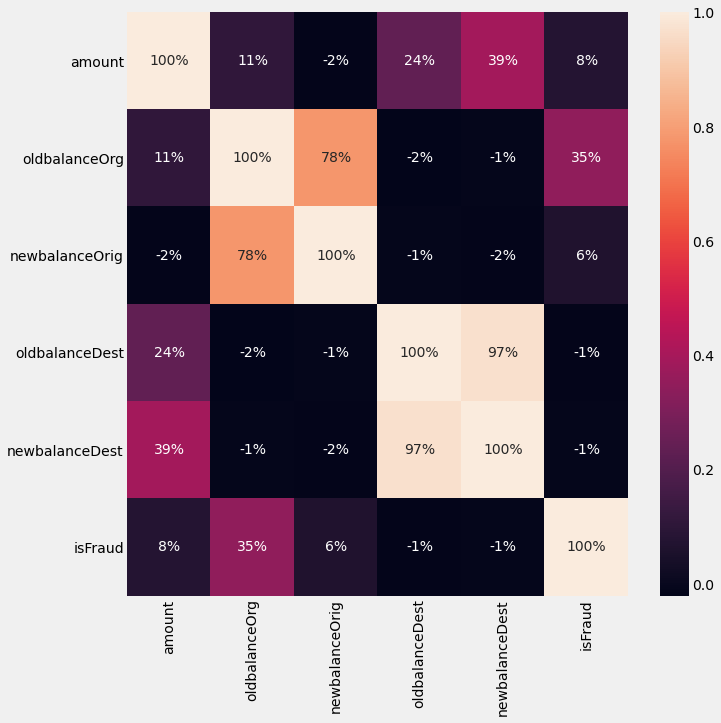

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True,fmt='.0%')

# 13. Create the Categorical variables for text features

In [80]:
df=pd.get_dummies(df)
df.reset_index(inplace=True)
df

,index,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_TRANSFER
0,2,13.453624,181.00,0.0,-1.00,-1.00,1,0,1
1,3,13.453624,181.00,0.0,21182.00,0.00,1,1,0
2,15,478.679371,15325.00,0.0,5083.00,51513.44,0,1,0
3,19,464.015409,705.00,0.0,22425.00,0.00,0,0,1
4,24,558.288357,10835.00,0.0,6267.00,2719172.89,0,0,1
...,...,...,...,...,...,...,...,...,...
2770404,6362615,582.822554,339682.13,0.0,0.00,339682.13,1,1,0
2770405,6362616,2512.251835,6311409.28,0.0,-1.00,-1.00,1,0,1
2770406,6362617,2512.251835,6311409.28,0.0,68488.84,6379898.11,1,1,0
2770407,6362618,921.955812,850002.52,0.0,-1.00,-1.00,1,0,1


# 14. Create the dependent and independent features

In [81]:
X = df.loc[:,['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','type_CASH_OUT','type_TRANSFER']]
Y = df.loc[:,'isFraud']

In [82]:
print('Original dataset shape {}'.format(Counter(Y)))

Original dataset shape Counter({0: 2762196, 1: 8213})


# 15. Perform OverSampling to prevent Imbalancing

In [83]:
os =  RandomOverSampler(sampling_strategy=0.6)
X_train_res, y_train_res = os.fit_resample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# 16. Split the train and Test Dataset

In [84]:

X_train, X_test, Y_train, Y_test = train_test_split(X_train_res,y_train_res, test_size=0.3, random_state=1)

# 17. Perform Standardization on the given dataset.

In [85]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 18. Create models on the Training Dataset

In [86]:
def models(X_train,Y_train):
    #Logistic Regression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    #Decision Tree
    tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,Y_train)
    
    #Random Forest Classifier
    forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(X_train,Y_train)
    
    #Print the output of training the 3 models
    print("Logistic Regression model result " , log.score(X_train,Y_train))
    print("Decision Tree classifier result " , tree.score(X_train,Y_train))
    print("Random Forest cassifier result " , forest.score(X_train,Y_train))
    
    return log , tree, forest

# 19. Get the result of model for Logistic Regression, Decision Tree, Random Forest using the Train dataset

In [87]:
model = models(X_train,Y_train)

Logistic Regression model result  1.0
Decision Tree classifier result  1.0
Random Forest cassifier result  1.0


# 20. Create a model that evaluates Performance Matrix such as
1. Accuracy of model
2. Confusion Matrix
3. Classification Report

In [88]:
def Perf_matrix(model_no):
    cm = confusion_matrix(Y_test,model[model_no].predict(X_test))
    
    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]
    
    Accuracy     = (TP+TN)/(TP+TN+FP+FN)
    preds        =     model[model_no].predict(X_test)
    Class_Report = classification_report(Y_test,preds)

    return cm,Accuracy,Class_Report

# 21. Performance Matrix of Logistic Regression Model

In [89]:
cm_log,Acc_log,Report_log = Perf_matrix(0)
print("The Accuracy of unkown dataset for Logistic Regression Model: ",Acc_log)
print('\n')
print("The Classification Report for Logistic Regression Model: \n",Report_log)
print('\n')
print("The Confusion Matrix for Logistic Regression Model: \n",cm_log)

The Accuracy of unkown dataset for Logistic Regression Model:  1.0


The Classification Report for Logistic Regression Model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828166
           1       1.00      1.00      1.00    497688

    accuracy                           1.00   1325854
   macro avg       1.00      1.00      1.00   1325854
weighted avg       1.00      1.00      1.00   1325854



The Confusion Matrix for Logistic Regression Model: 
 [[828166      0]
 [     0 497688]]


# 22. Performance Matrix of Decision Tree Model

In [90]:
cm_tree,Acc_tree,Report_tree = Perf_matrix(1)
print("The Accuracy of unkown dataset for Decision Tree Model: ",Acc_tree)
print('\n')
print("The Classification Report for Decision Tree Model: \n",Report_tree)
print('\n')
print("The Confusion Matrix for Decision Tree Model: \n",cm_tree)

The Accuracy of unkown dataset for Decision Tree Model:  1.0


The Classification Report for Decision Tree Model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828166
           1       1.00      1.00      1.00    497688

    accuracy                           1.00   1325854
   macro avg       1.00      1.00      1.00   1325854
weighted avg       1.00      1.00      1.00   1325854



The Confusion Matrix for Decision Tree Model: 
 [[828166      0]
 [     0 497688]]


# 23. Performance Matrix of Random Forest Model 

In [91]:
cm_forest,Acc_forest,Report_forest = Perf_matrix(2)
print("The Accuracy of unkown dataset for Random Forest Model: ",Acc_forest)
print('\n')
print("The Classification Report for Random Forest Model: \n",Report_forest)
print('\n')
print("The Confusion Matrix for Random Forest Model: \n",cm_forest)

The Accuracy of unkown dataset for Random Forest Model:  1.0


The Classification Report for Random Forest Model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828166
           1       1.00      1.00      1.00    497688

    accuracy                           1.00   1325854
   macro avg       1.00      1.00      1.00   1325854
weighted avg       1.00      1.00      1.00   1325854



The Confusion Matrix for Random Forest Model: 
 [[828166      0]
 [     0 497688]]
